## Red Wine Quality Dataset
---

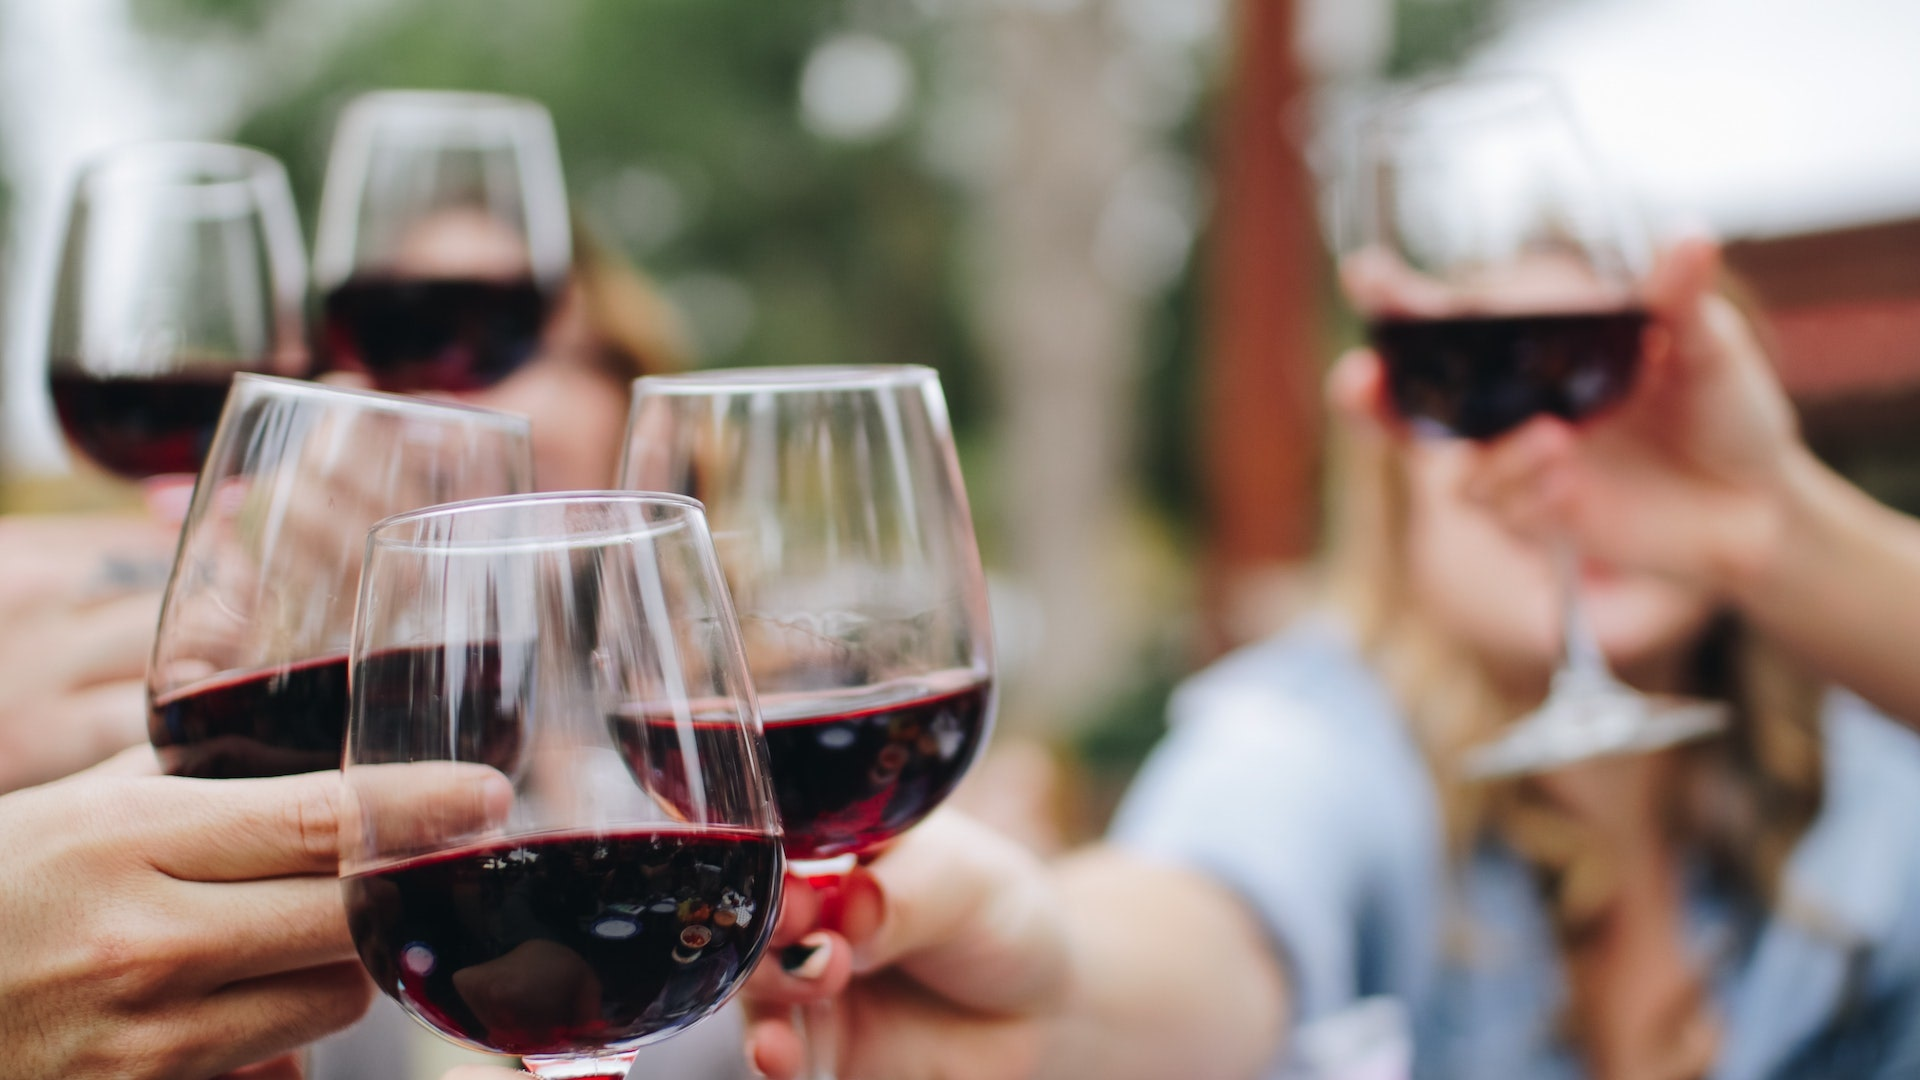

---

### Acquire

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

plt.rc('figure', figsize = (13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size = 12)

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


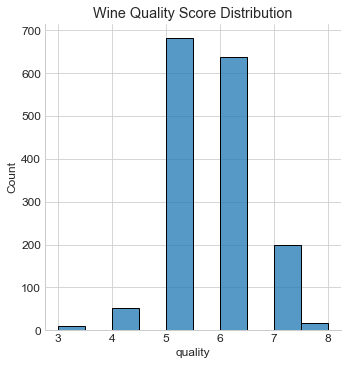

In [35]:
sns.displot(x = 'quality', data = df, weights = 1)
plt.title('Wine Quality Score Distribution')
plt.show();

---
#### Takeaways:
- Quite a small dataset...less than 1600 rows and only 12 columns (including target variable)
- Average quality of wine on a 10 point scale for this dataset is 5.6
- Maximum quality ranking on a 10 point scale for this dataset is 8
- Exclusively non-categorical features for this dataset at this point.

---

### Initial Questions:
1. Does alcohol content have any relation to how good the wine is?

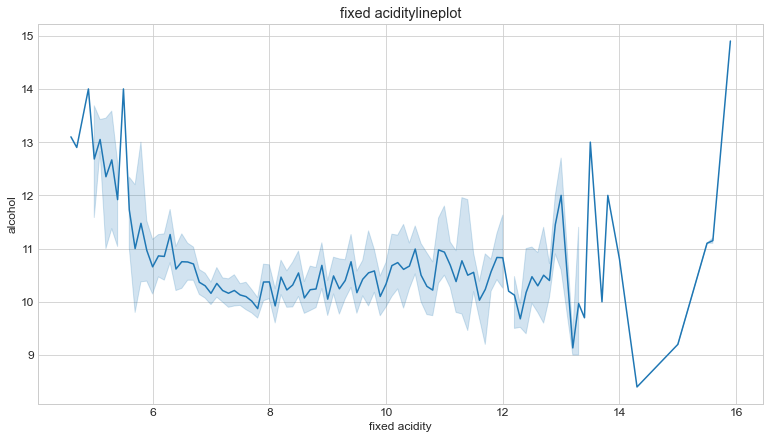

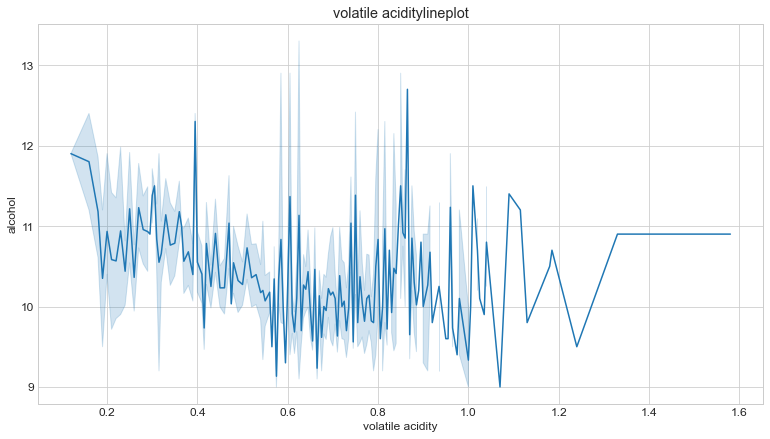

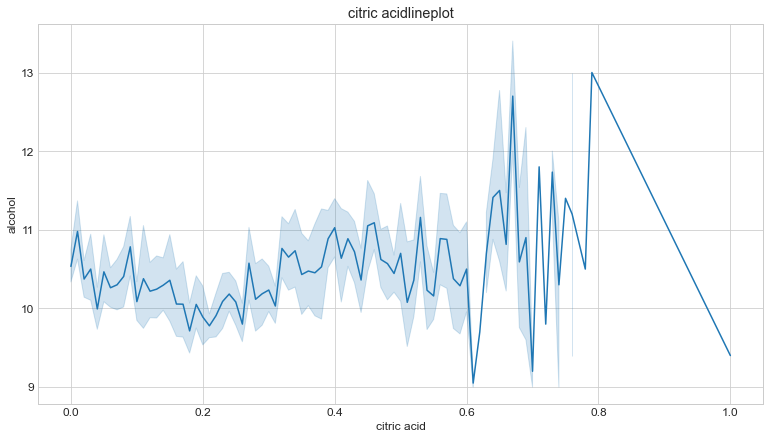

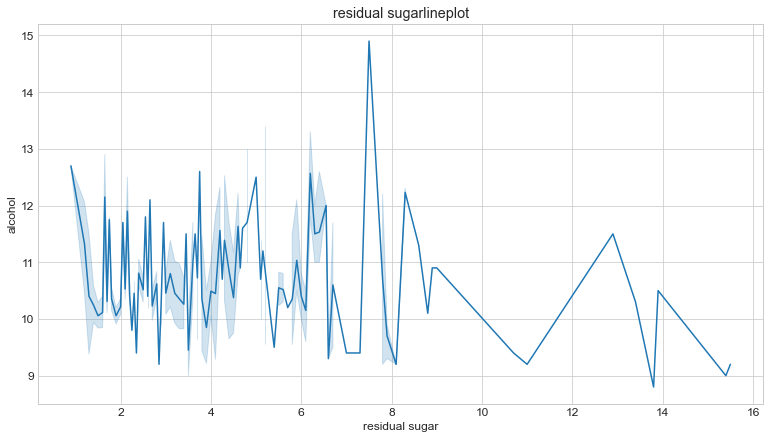

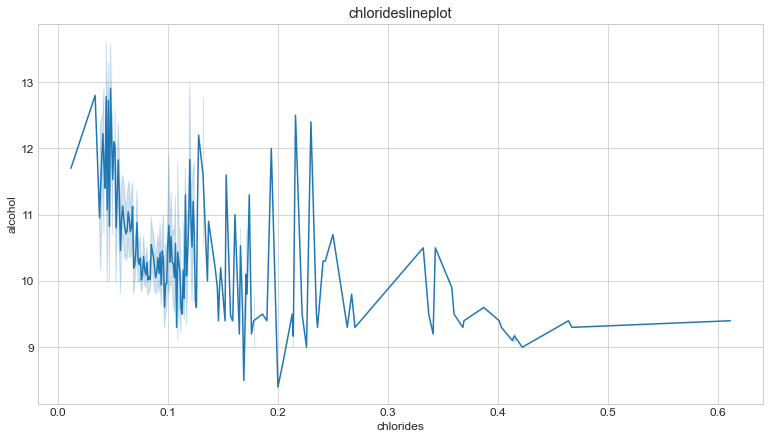

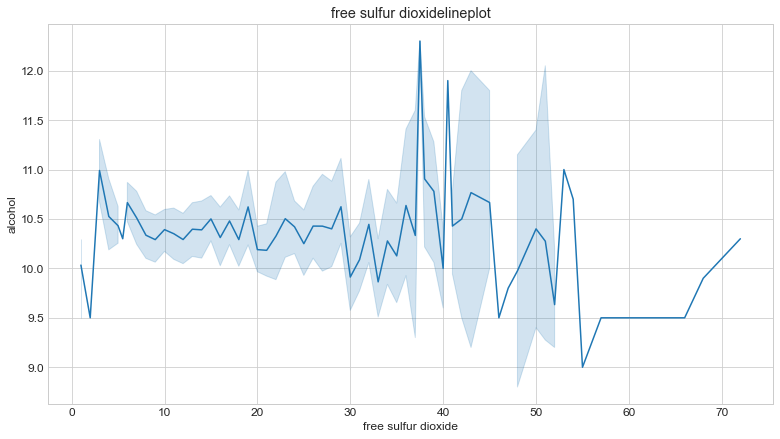

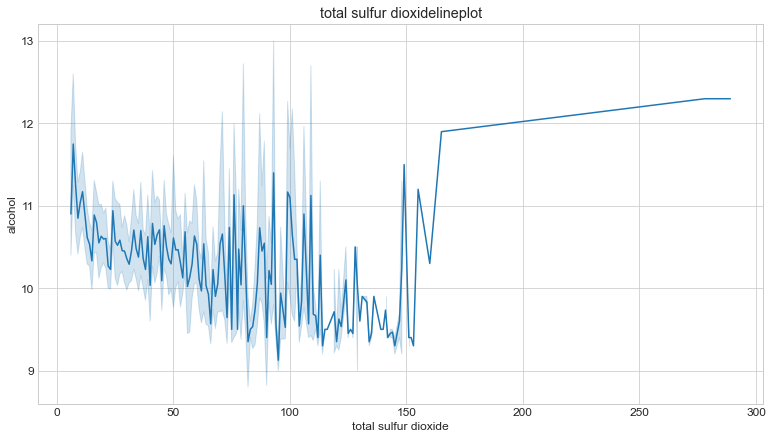

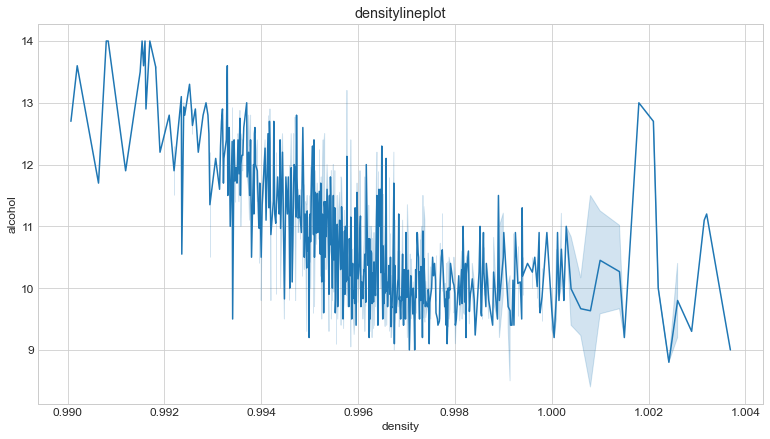

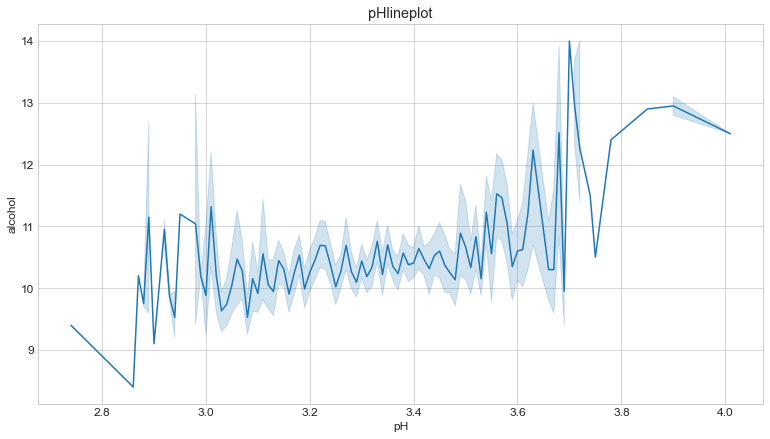

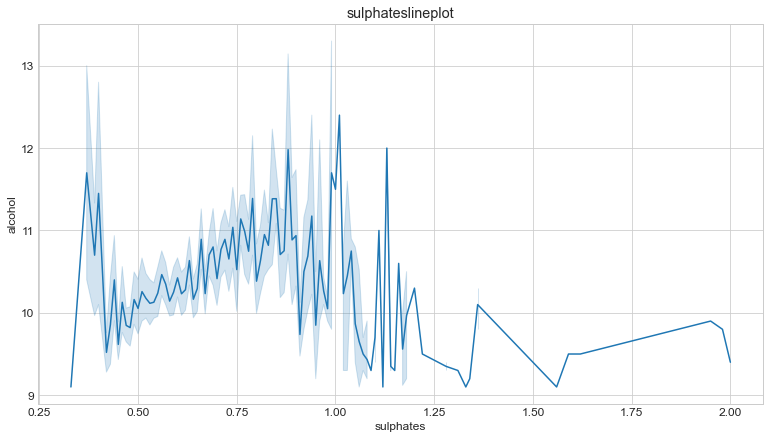

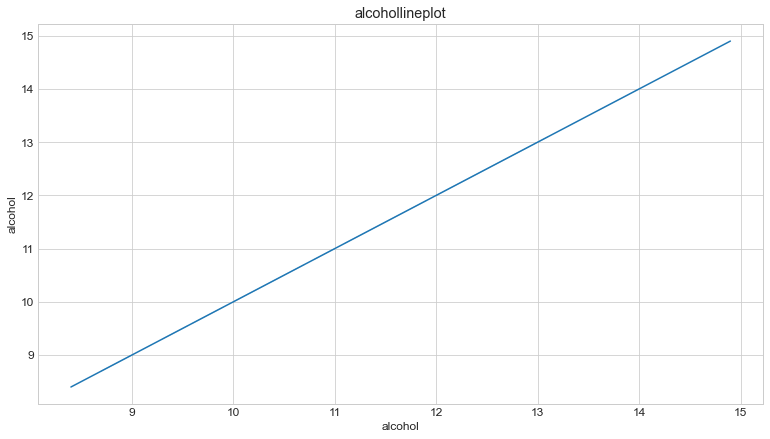

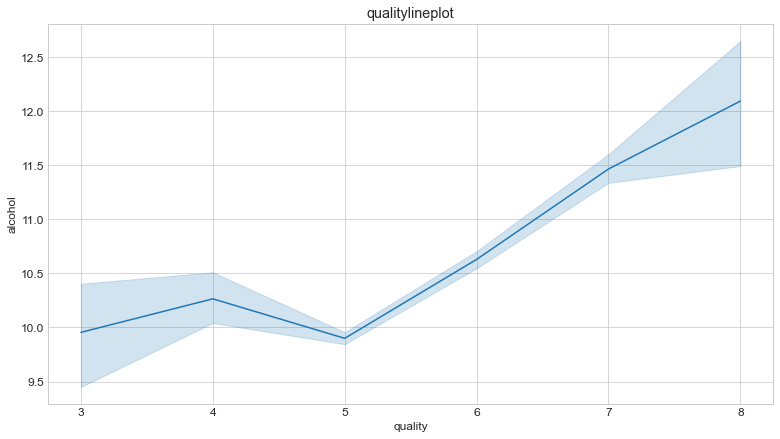

In [37]:
for col in df:
    sns.lineplot(x = col, y = df['alcohol'], data = df)
    plt.title(col + 'lineplot')
    plt.show();

2. What is the proportion of each quality score?

3. What features(s) correlate the most with wine quality?

4. Would splitting setting upt a categorical feature for quality instead of a numeric feature help uncover different trends in this dataset?

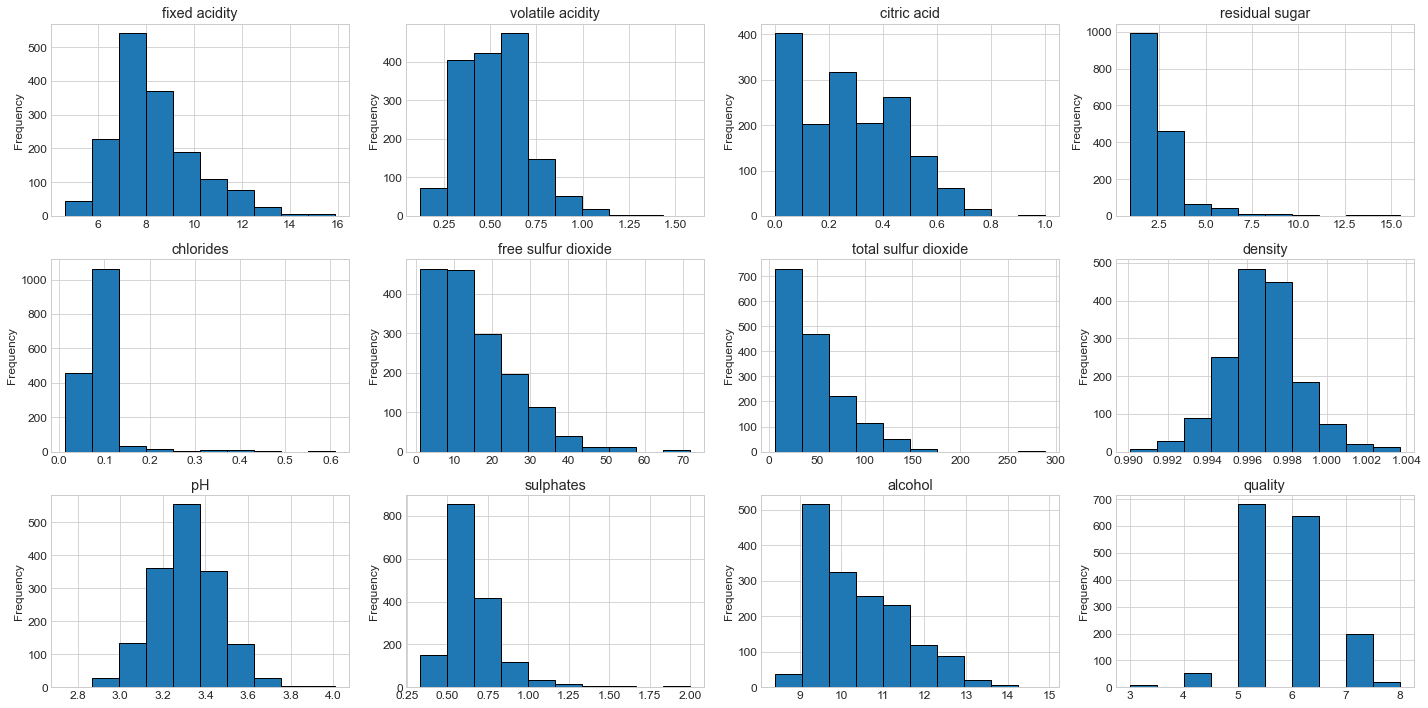

In [5]:
fig, axs = plt.subplots(3, 4, figsize = (20, 10))
fl_ax = axs.ravel()
for i, col in enumerate(df.columns):
    df[col].plot.hist(ax = fl_ax[i], title = col, ec = 'black')
    plt.tight_layout()

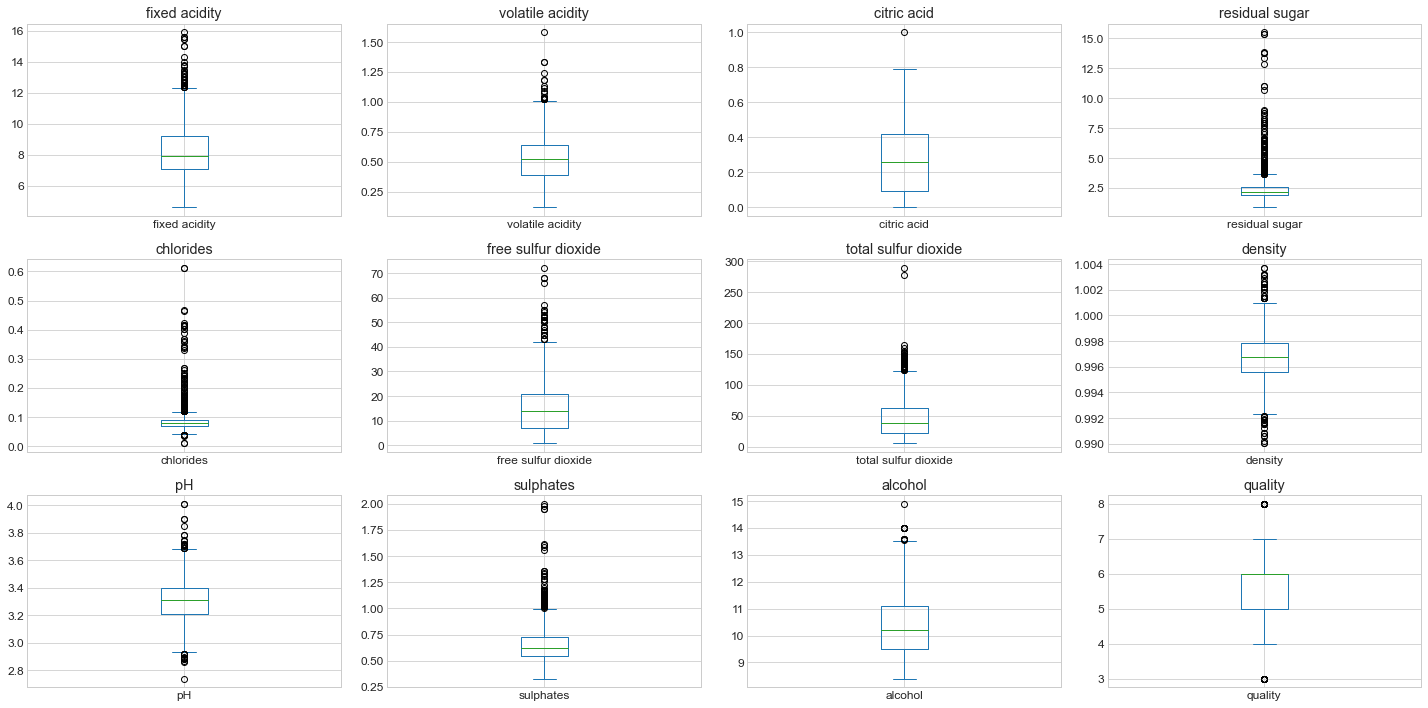

In [6]:
fig, axs = plt.subplots(3, 4, figsize = (20, 10))
fl_ax = axs.ravel()
for i, col in enumerate(df.columns):
    df[col].plot.box(ax = fl_ax[i], title = col)
    plt.tight_layout()

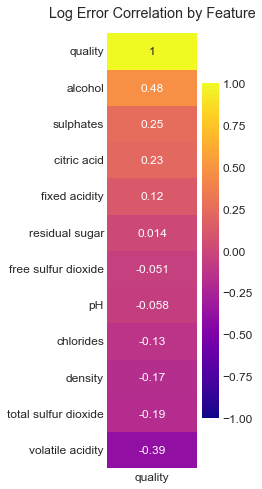

In [7]:
plt.figure(figsize = (2, 8))
heatmap = sns.heatmap(df.corr()[['quality']].sort_values(by = 'quality', ascending = False), annot = True, cmap = 'plasma', vmin = -1, vmax = 1 );
heatmap.set_title('Log Error Correlation by Feature', pad=16);

In [8]:
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis = 1)
df = df[filtered_entries]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1451 non-null   float64
 1   volatile acidity      1451 non-null   float64
 2   citric acid           1451 non-null   float64
 3   residual sugar        1451 non-null   float64
 4   chlorides             1451 non-null   float64
 5   free sulfur dioxide   1451 non-null   float64
 6   total sulfur dioxide  1451 non-null   float64
 7   density               1451 non-null   float64
 8   pH                    1451 non-null   float64
 9   sulphates             1451 non-null   float64
 10  alcohol               1451 non-null   float64
 11  quality               1451 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 147.4 KB


In [10]:
df['quality_rank'] = df['quality']
df['quality_rank'].replace(to_replace = [3, 4, 5, 6, 7, 8], value = ['bad', 'bad', 'bad', 'average', 'good', 'good'], inplace = True)


In [11]:
df.quality_rank.value_counts()

bad        664
average    586
good       201
Name: quality_rank, dtype: int64

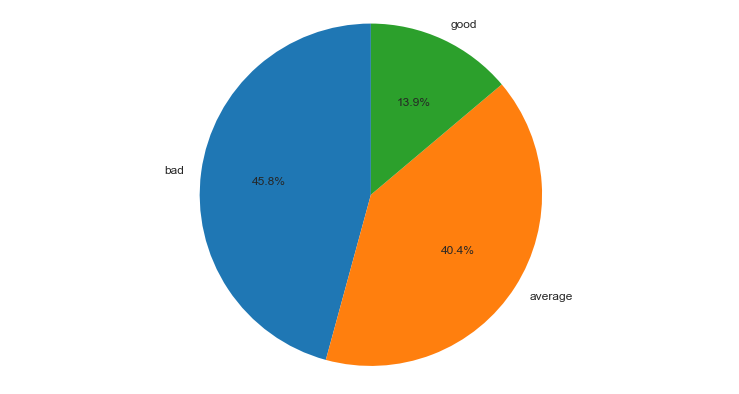

In [12]:
fig1, ax1 = plt.subplots()

ax1.pie(df.quality_rank.value_counts(), labels = list(df.quality_rank.value_counts().index), autopct = '%1.1f%%', startangle = 90)

ax1.axis('equal')

plt.show()

In [13]:
df.quality_rank.value_counts().sum()

1451

In [14]:
list(df.quality_rank.value_counts().index)

['bad', 'average', 'good']

In [48]:
df.drop(columns = 'quality', inplace = True)

In [49]:
def train_validate_test_split(df, target, seed = 123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [50]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target = 'quality_rank', seed = 123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns = ['quality_rank'])
y_train = train.quality_rank

X_validate = validate.drop(columns = ['quality_rank'])
y_validate = validate.quality_rank

X_test = test.drop(columns = ['quality_rank'])
y_test = test.quality_rank


In [51]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 123).fit(X_train, y_train)
y_pred = clf.predict(X_train)
y_pred


array(['average', 'bad', 'average', 'bad', 'bad', 'bad', 'average',
       'average', 'good', 'average', 'average', 'good', 'average',
       'average', 'average', 'average', 'bad', 'average', 'average',
       'average', 'bad', 'bad', 'bad', 'average', 'bad', 'bad', 'average',
       'good', 'bad', 'good', 'good', 'bad', 'bad', 'average', 'bad',
       'bad', 'average', 'average', 'average', 'bad', 'bad', 'good',
       'bad', 'average', 'bad', 'bad', 'bad', 'bad', 'average', 'bad',
       'bad', 'bad', 'average', 'bad', 'bad', 'bad', 'bad', 'good',
       'average', 'good', 'average', 'bad', 'bad', 'average', 'bad',
       'average', 'bad', 'bad', 'bad', 'average', 'average', 'bad',
       'average', 'average', 'average', 'good', 'average', 'average',
       'average', 'bad', 'good', 'average', 'bad', 'bad', 'average',
       'average', 'bad', 'bad', 'bad', 'average', 'bad', 'good', 'bad',
       'average', 'average', 'average', 'bad', 'good', 'bad', 'bad',
       'average', 'bad', '

In [52]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.73


In [53]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 123).fit(X_validate, y_validate)
y_pred = clf.predict(X_validate)

In [54]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.72


In [55]:
rf = RandomForestClassifier(bootstrap = True, 
                            class_weight = None, 
                            criterion = 'gini',
                            min_samples_leaf = 4,
                            n_estimators = 100,
                            max_depth = 5, 
                            random_state = 123).fit(X_train, y_train)

y_pred = rf.predict(X_train)

In [56]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.58


In [57]:
rf = RandomForestClassifier(bootstrap = True, 
                            class_weight = None, 
                            criterion = 'gini',
                            min_samples_leaf = 4,
                            n_estimators = 100,
                            max_depth = 5, 
                            random_state = 123).fit(X_validate, y_validate)

y_pred = rf.predict(X_validate)

In [58]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.72


In [59]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').fit(X_train, y_train)
y_pred = rf.predict(X_train)

In [60]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.58


In [61]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').fit(X_validate, y_validate)
y_pred = rf.predict(X_validate)

In [62]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.72


In [63]:
lr = LogisticRegression(C = .1, random_state = 123, intercept_scaling = 1, solver = 'lbfgs').fit(X_train, y_train)
y_pred = lr.predict(X_train)

In [64]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.58


In [65]:
lr = LogisticRegression(C = .1, random_state = 123, intercept_scaling = 1, solver = 'lbfgs').fit(X_validate, y_validate)
y_pred = lr.predict(X_validate)

In [66]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.72
